In [109]:
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
d = pd.read_csv("./sorted_gap.csv")
d.gap.hist(bins=20)
d

topic   gap
0                   mécanique aéronautique et spatiale  61.4
1                         direction de chantier du btp  59.9
2                        conduite d'engins de chantier  56.6
3            conduite d'engins agricoles et forestiers  55.5
4                                          métallurgie  55.4
..                                                 ...   ...
202  secrétariat et assistanat médical ou médico-so... -21.1
203                                           coiffure -21.3
204                               aide en puériculture -22.7
205                     mannequinat et pose artistique -24.2
206       soins infirmiers spécialisés en puériculture -32.9

[207 rows x 2 columns]

<Axes: >

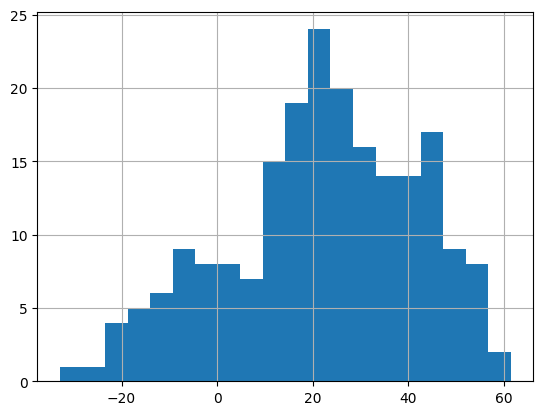

In [117]:
# Gaussian of Gap Distribution
d.gap.hist(bins=20)

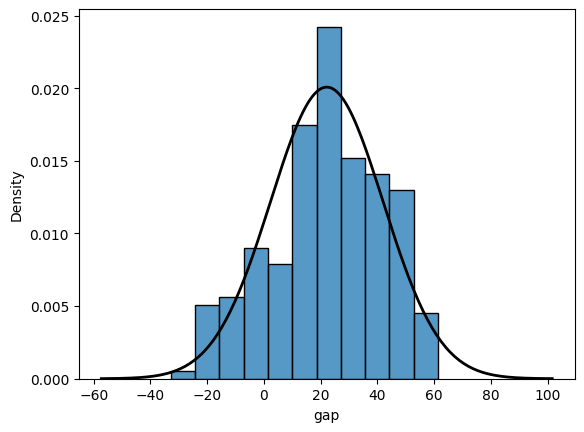

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def normal(mean, std, color="black"):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = stats.norm.pdf(x, mean, std)
    z = plt.plot(x, p, color, linewidth=2)

data = d.gap    
ax = sns.histplot(x=data, stat="density")
normal(data.mean(), data.std())

In [108]:
def plot_line(df, filename = None):
        
    l, r = df.gap.min(), d.gap.max()
    scale = (r-l)/20
    l = round(l-scale)
    r = round(r+scale)
    
    
    # set up the figure
    # figure(figsize=(8, 6), dpi=80)
    fig = plt.figure(dpi=400, figsize=(20, 4))
    ax = fig.add_subplot(111)
    ax.set_xlim(l-scale, r+scale)
    ax.set_ylim(0,20)
    
    # draw lines
    xmin = l
    xmax = r
    y = 5
    height = 1
    
    plt.hlines(y, xmin, xmax)
    plt.vlines(xmin, y - height / 2., y + height / 2.)
    plt.vlines(xmax, y - height / 2., y + height / 2.)
    
    # draw a point on the line
    px = 20
    plt.plot(df.gap,[5]*df.shape[0], 'ro', ms = 4, mfc = 'r')
    
    # plt.xticks(range(10), d.topic[10]) # Redefining x-axis labels
    
    for row in df.iloc:
        plt.text(row.gap, 6, "%s" %row.topic, ha="center", fontsize='xx-small', rotation=90)
    if filename:
        plt.savefig(filename)
    plt.show()


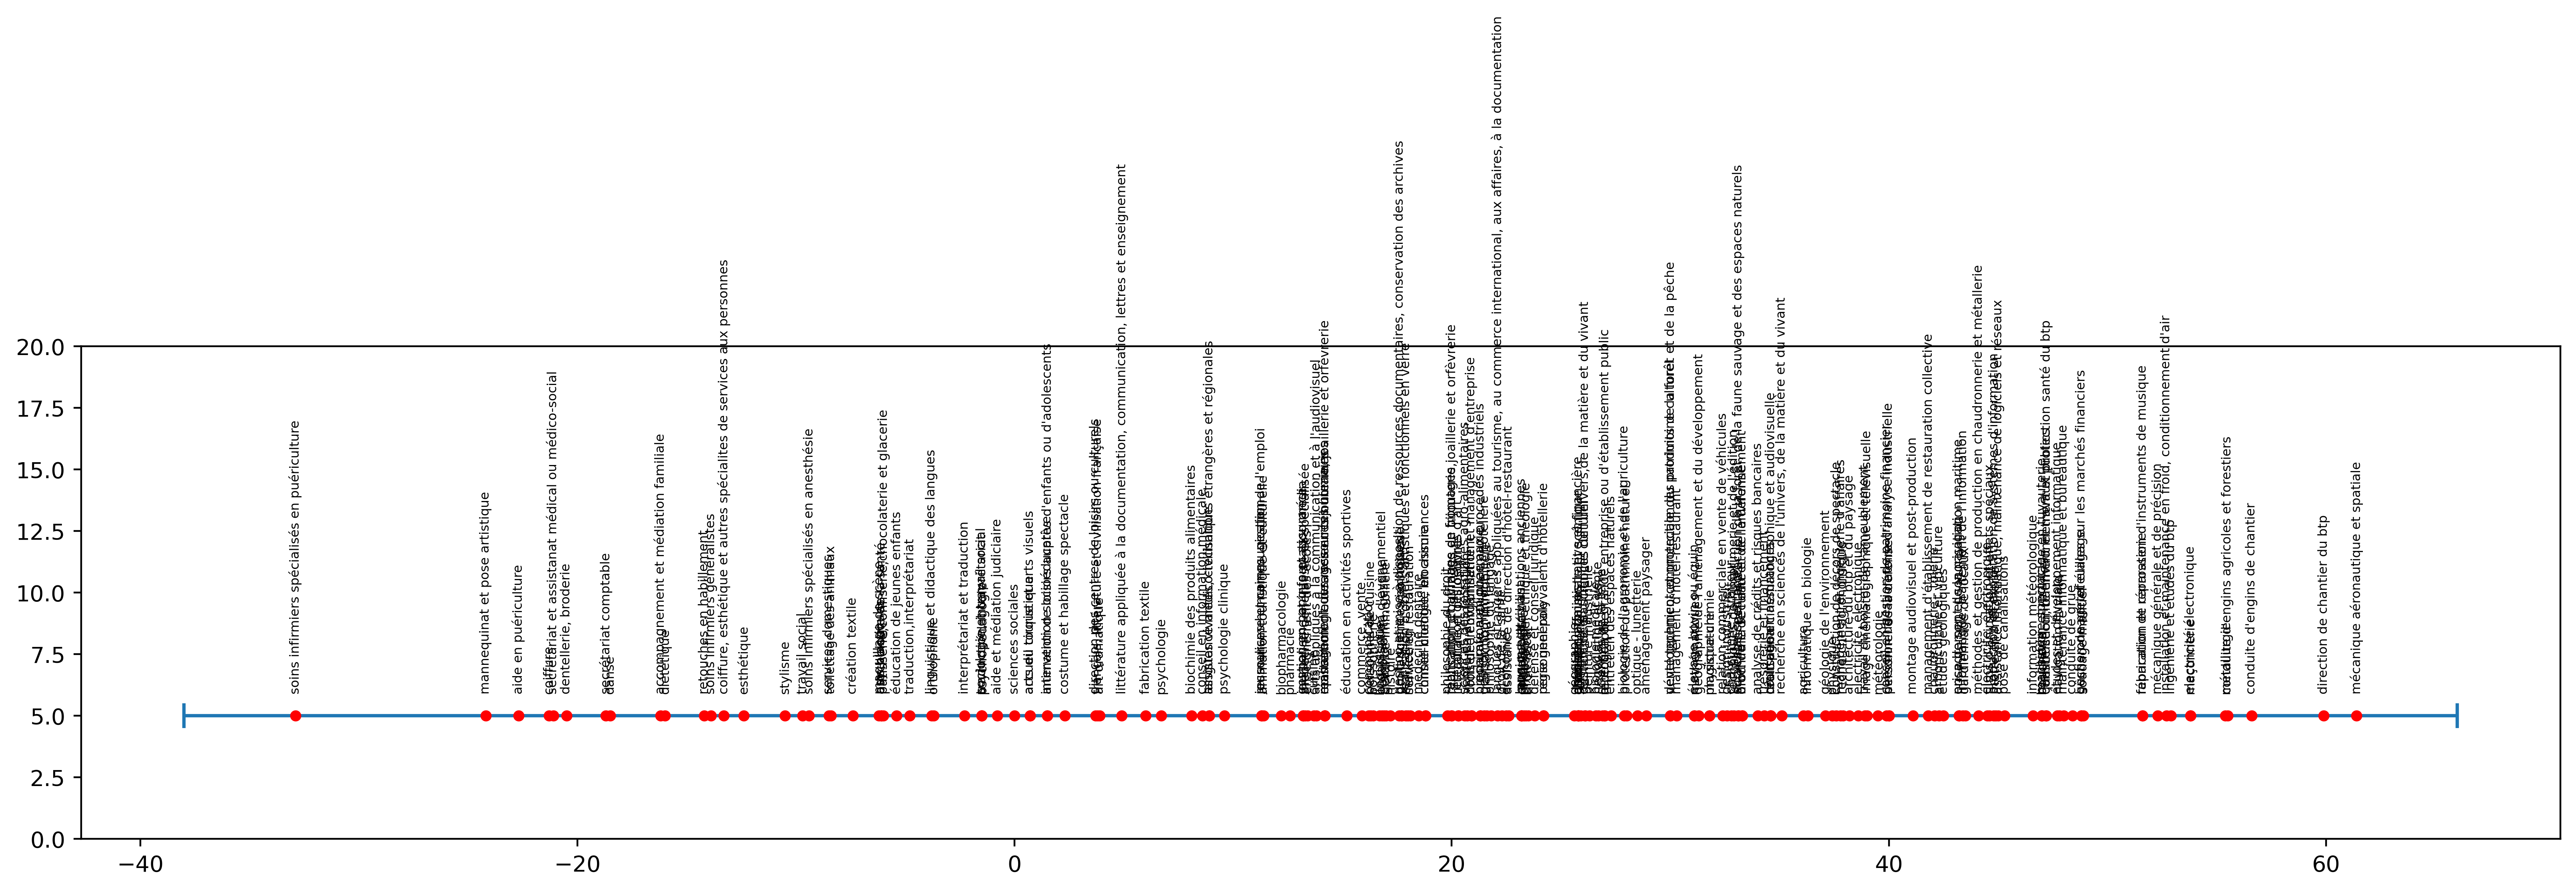

In [112]:
# Plot all
df = pd.read_csv('./sorted_gap.csv')
plot_line(df, 'line.png')

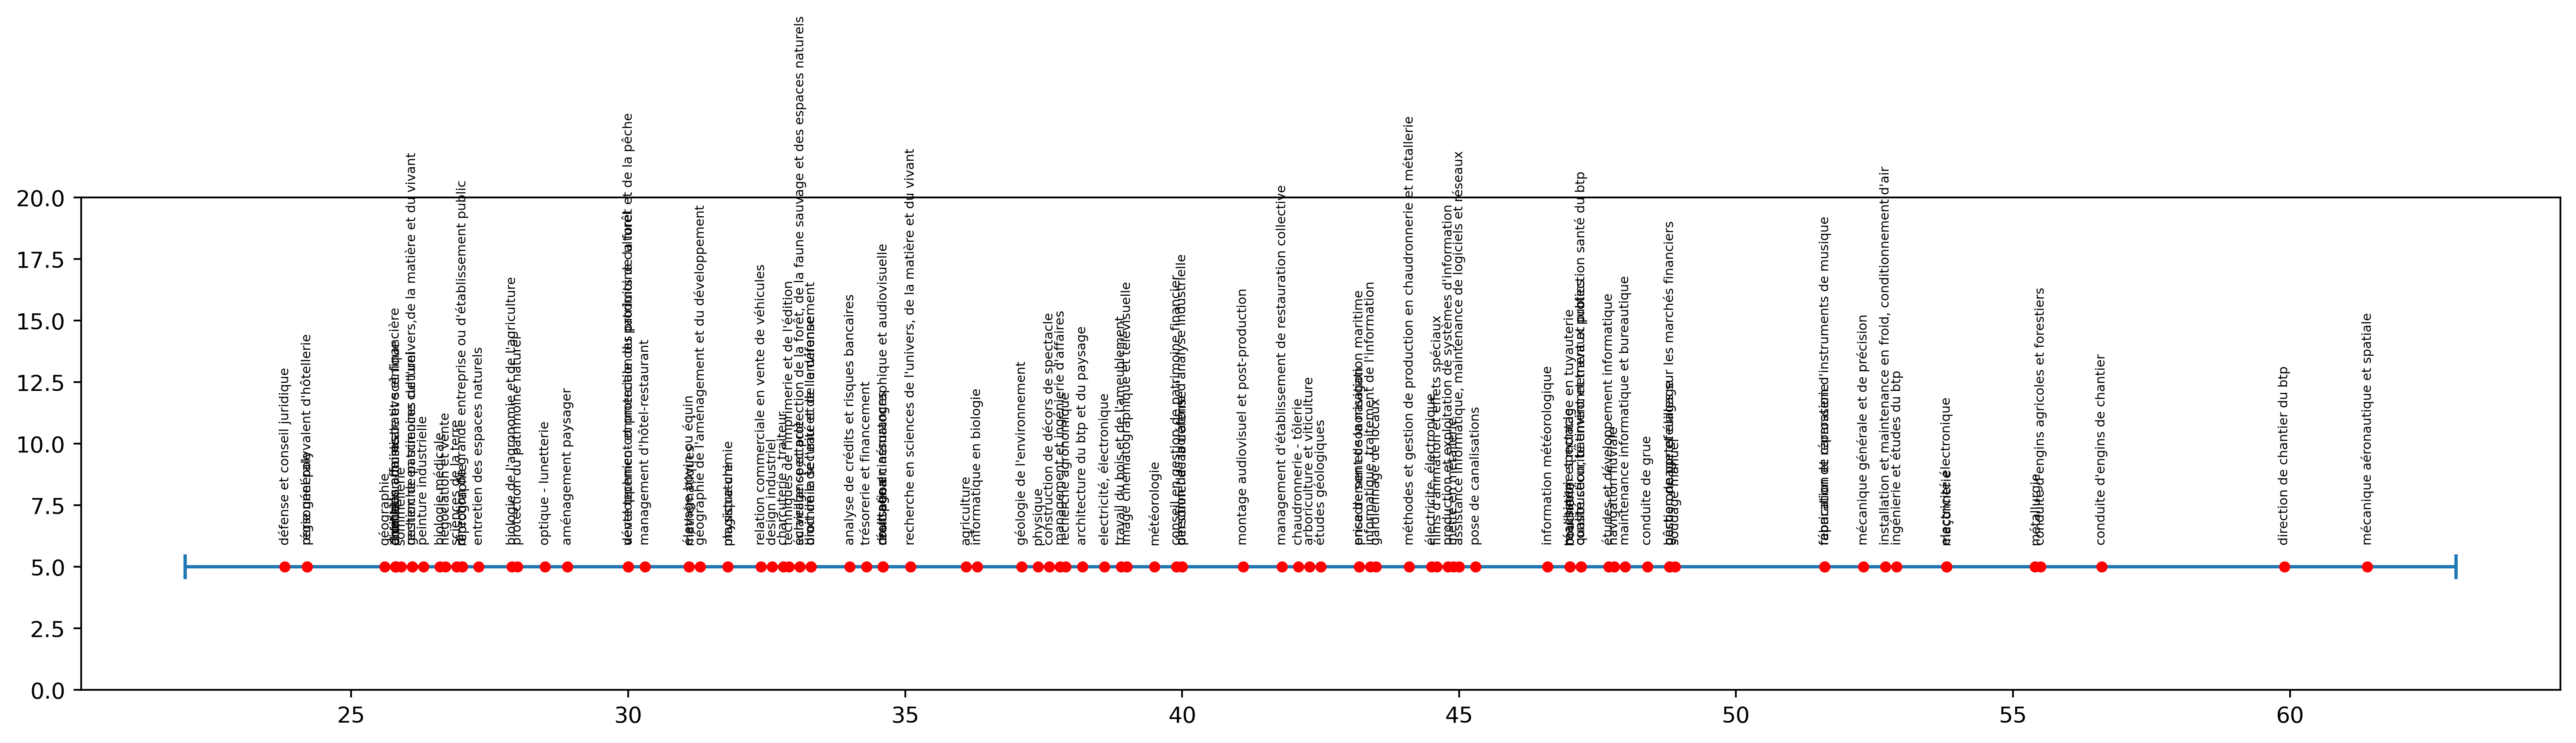

In [113]:
# Plot Left half
df = pd.read_csv('./sorted_gap.csv')
df = df.iloc[:100]
plot_line(df, 'line-half-1.png')

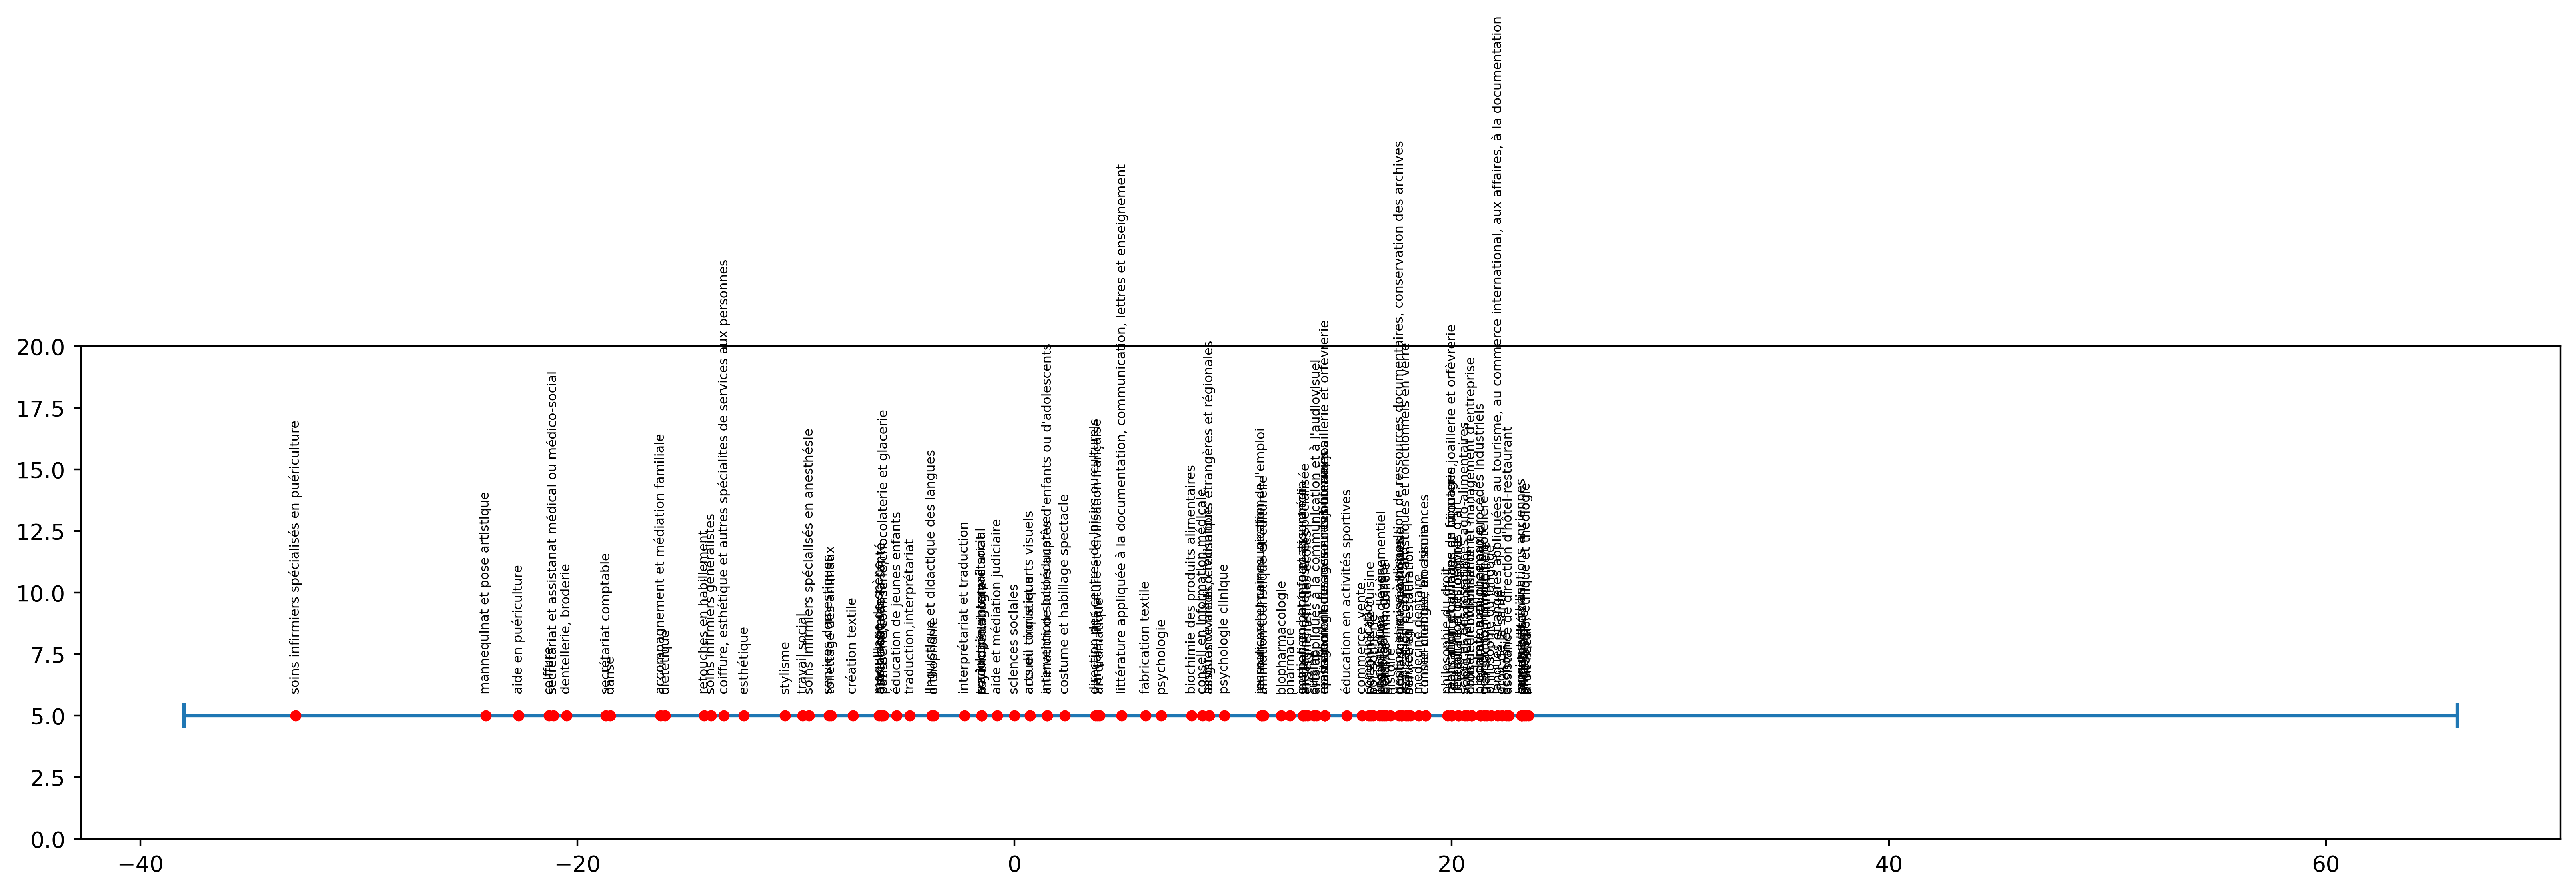

In [114]:
# Plot Right half
df = pd.read_csv('./sorted_gap.csv')
df = df.iloc[100:]
plot_line(df, 'line-half-2.png')

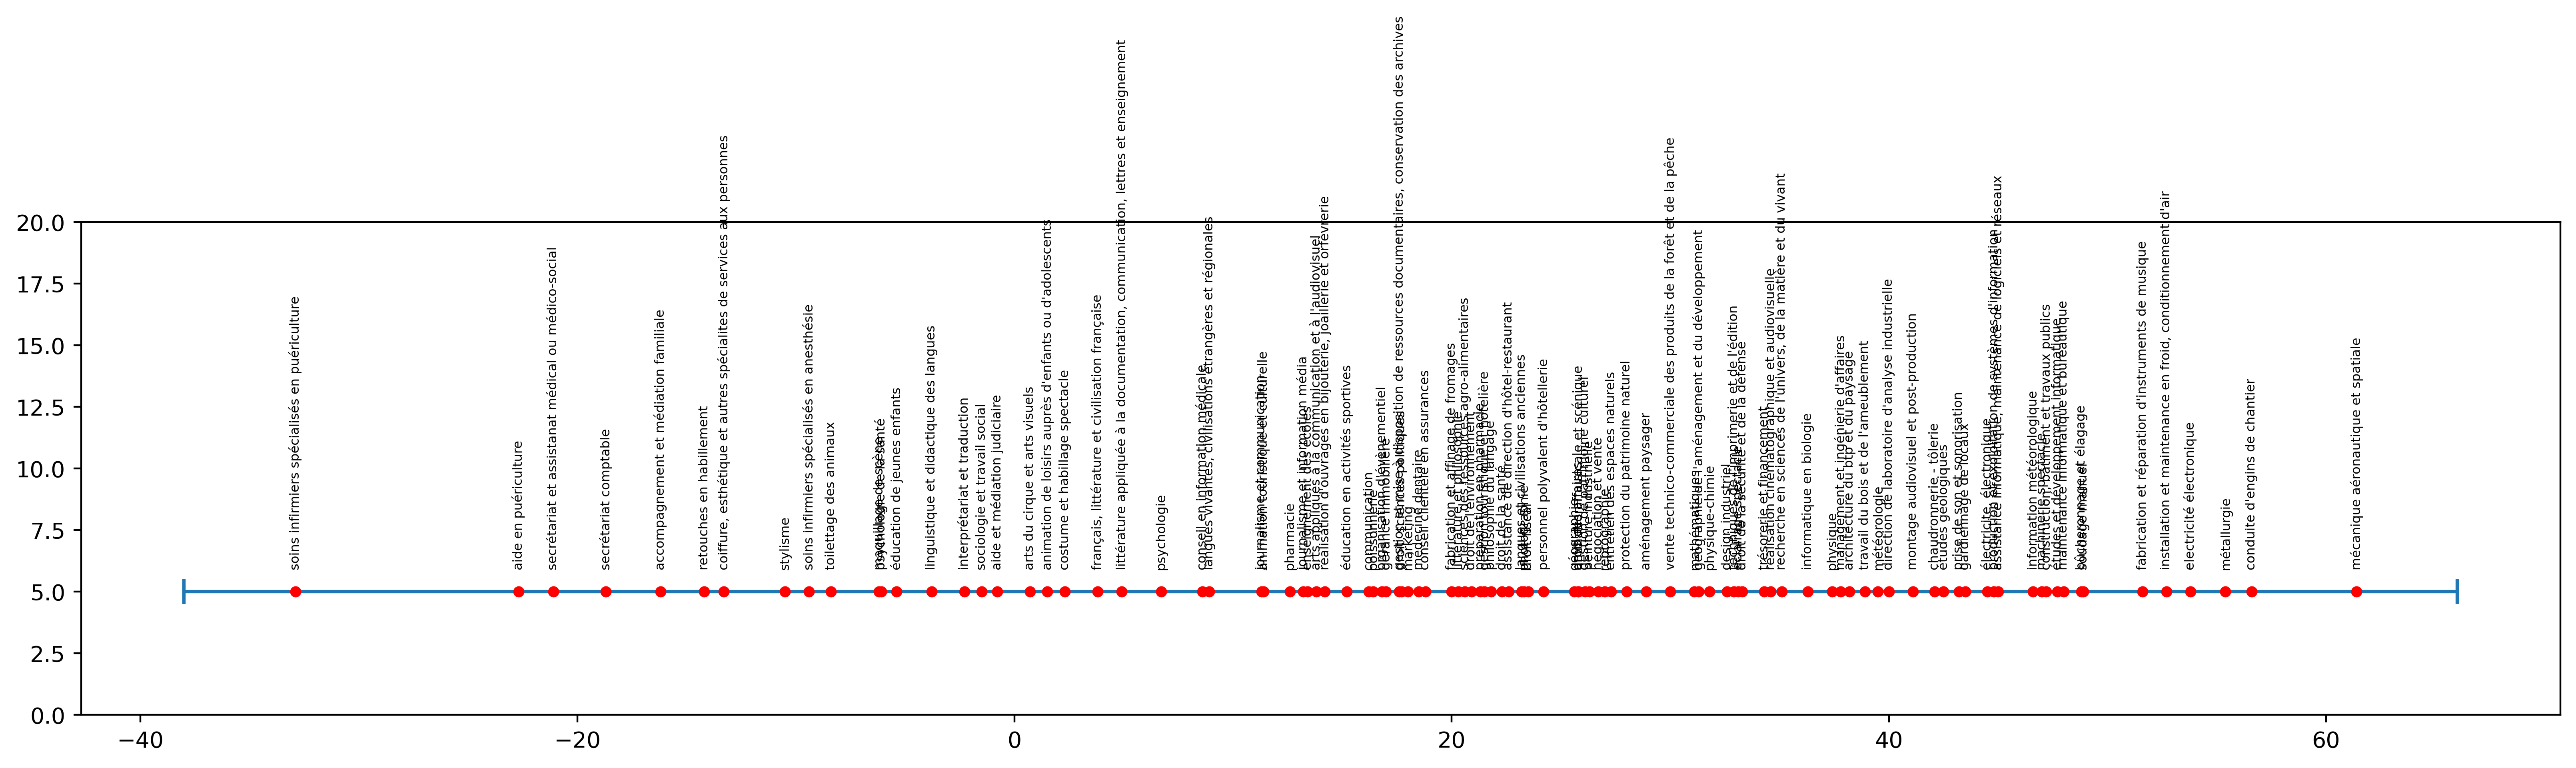

In [115]:
# Plot Even
data = pd.read_csv('./sorted_gap.csv')
df = data.iloc[::2]
plot_line(df, 'line-even.png')

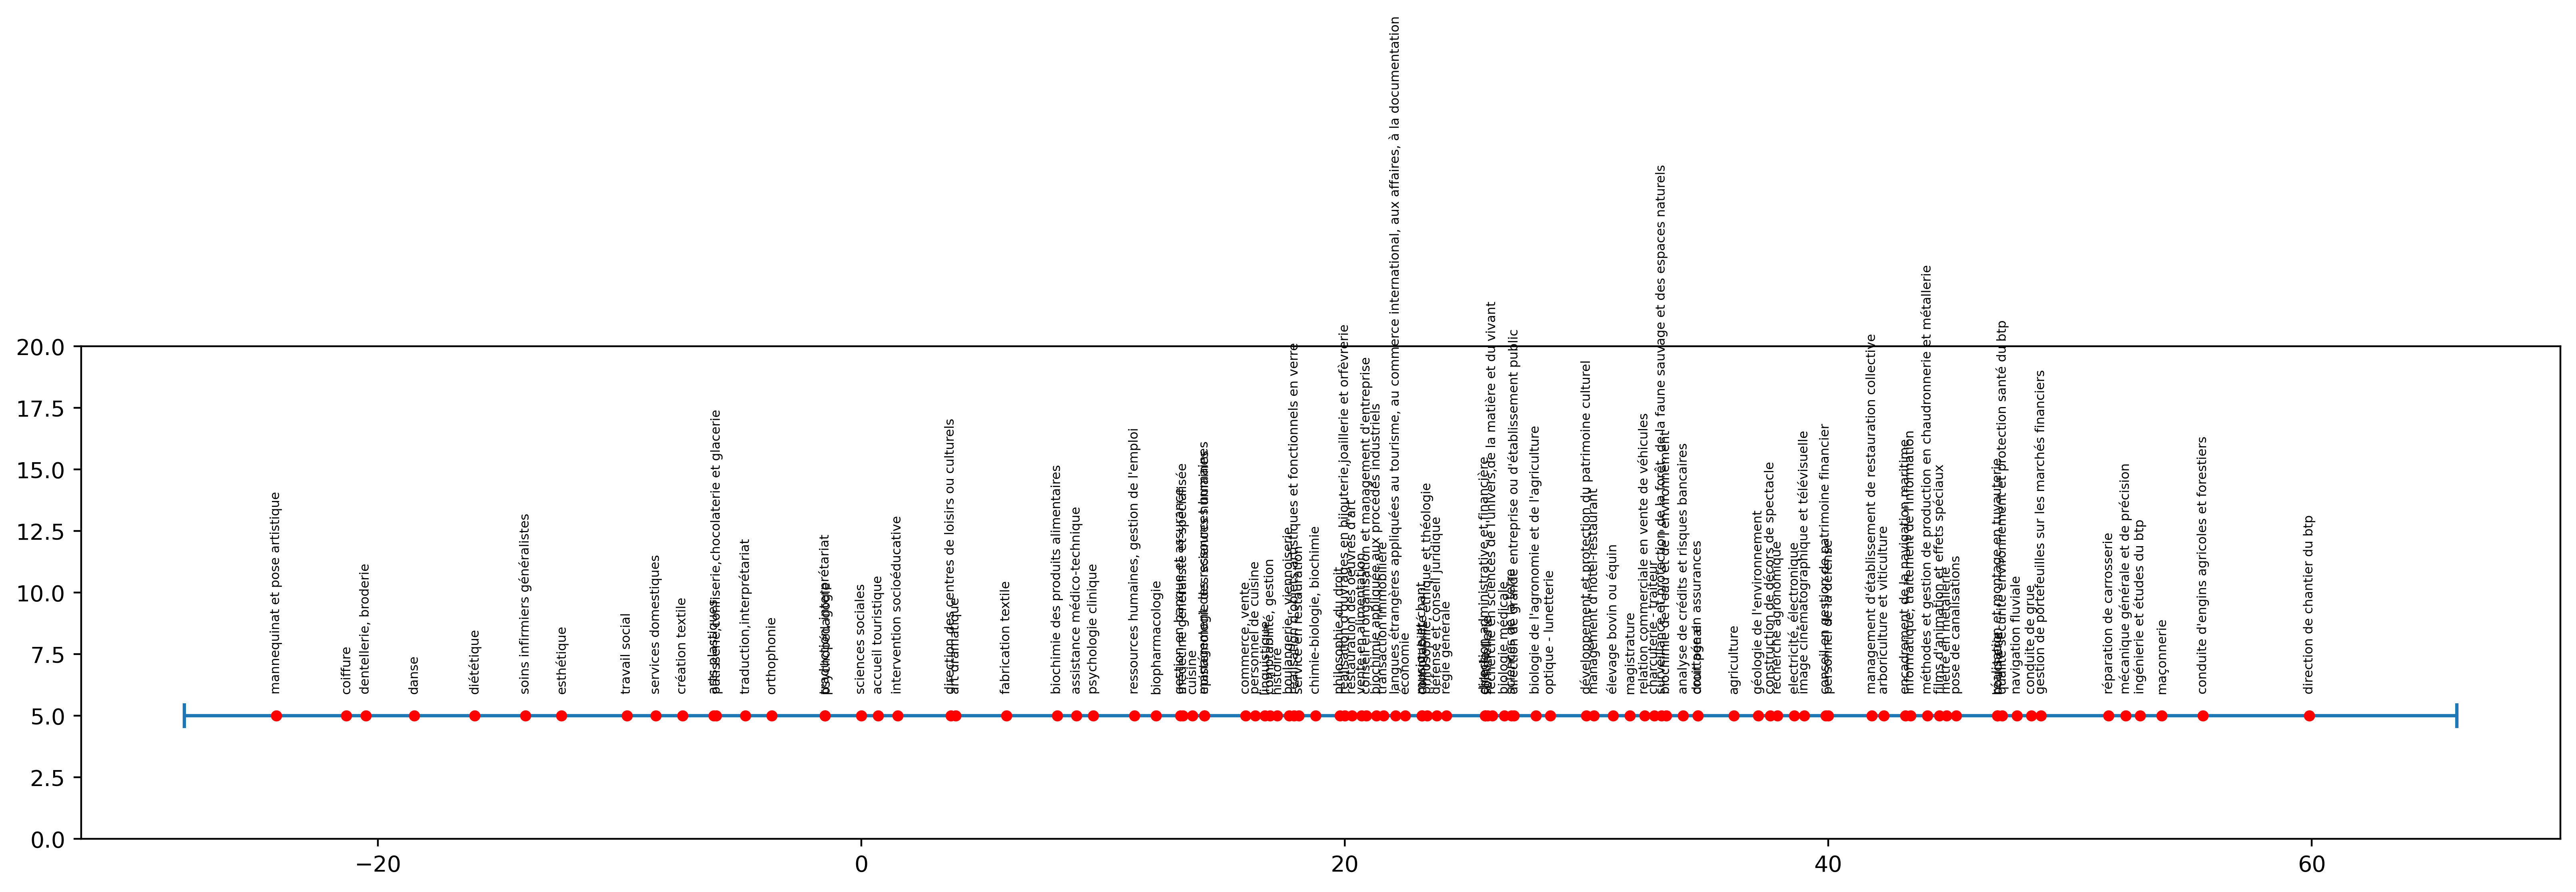

In [116]:
# Plot Odd
data = pd.read_csv('./sorted_gap.csv')
df = data.iloc[1::2]
plot_line(df, 'line-odd.png')